In [ ]:
%tensorflow_version 2.x
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

We will use MNIST Fashion dataset.

Contains 60k images for training and 10k for validation

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
type(train_images)

numpy.ndarray

Our labels are integers ranging from 0 to 9. Each integer represents a specific article of clothing. We will create an array of label names to indicate which is which.



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

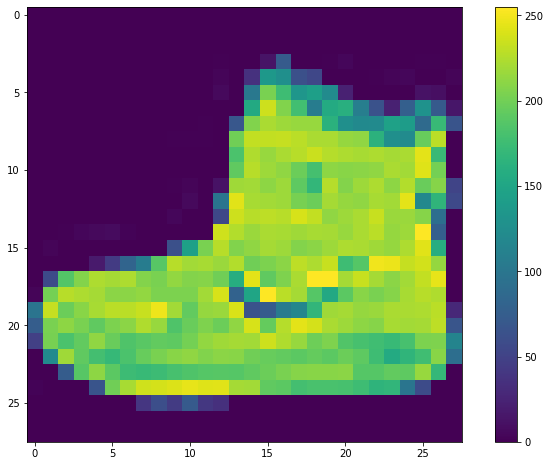

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

We are gonna apply some transformations to our data before feeding it to the model. In this case we will simply scale our pixel values (0-255) to be between 0 and 1. We can do this by dividing the values by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model

This Model represents a feed-forward neural network. 

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)), # Input layer (1)
                          keras.layers.Dense(128, activation = 'relu'), # Hidden Layer (2)
                          keras.layers.Dense(10, activation = 'softmax') # Output Layer (3)
])

## Compile the Model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

## Training the Model

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6346 - accuracy: 0.7835
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3781 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2875 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.8971
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

## Testing the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8875
Test Accuracy: 0.887499988079071


## Making Predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([3.0340911e-07, 2.7838267e-09, 2.0725797e-07, 1.1677327e-08,
       1.2768330e-05, 7.7468813e-03, 5.4421946e-07, 1.5209744e-02,
       8.4285162e-08, 9.7702938e-01], dtype=float32)

Pullover


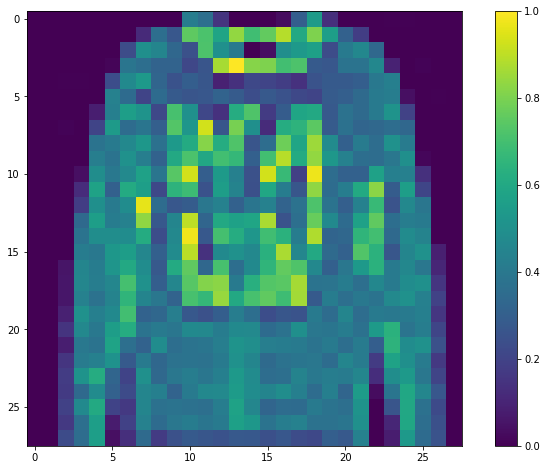

In [ ]:
print(class_names[np.argmax(predictions[500])])
plt.figure(figsize = (12,8))
plt.imshow(test_images[500])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
np.argmax(predictions[0])

9

## Verifying Predictions

Pick a number: 45


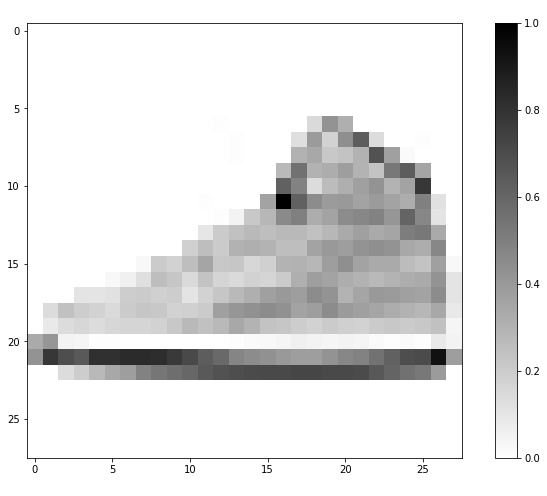

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure(figsize = (12,8))
  plt.imshow(img, cmap = plt.cm.binary)
  plt.title("Expected: "+ label)
  plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
    while True:
      num = input("Pick a number: ")
      if num.isdigit():
        num = int(num)
        if 0 <= num <= 10000:
          return int(num)
      else:
        print("Try Again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

# Convolutional Neural Networks

The goal of our CNN will be to classify and detect images or specific objects from within the image. We  will be using image data as our features and a label for those images as our output.

The concepts that we are going to see here are:

* Image Data
* Convolutional Layer
* Pooling Layer
* CNN Architectures

What CNN does is, it studies the image based on the local points and then can identify those points anywhere within the image.

## Dataset

We will use the CIFAR Image Dataset. COntains 60k 32x32 color images with 6000 images for each class.

It contains the following classes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load and split the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


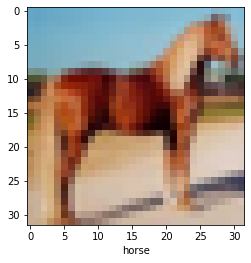

In [ ]:
# Let's look at one image
IMG_INDEX = 43 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture

A common architecture is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densely connected layers that determine the class of an image based on the presence of features.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

### Layer 1

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3,3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

### Layer 2

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

### Other Layers

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## Adding Dense Layers

So far we have just completed the convolutional base. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

## Training the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.7756 - accuracy: 0.3425 - val_loss: 1.2961 - val_accuracy: 0.5328
Epoch 2/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.2076 - accuracy: 0.5715 - val_loss: 1.1442 - val_accuracy: 0.5972
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0568 - accuracy: 0.6308 - val_loss: 1.0114 - val_accuracy: 0.6482
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9433 - accuracy: 0.6706 - val_loss: 0.9838 - val_accuracy: 0.6572
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8609 - accuracy: 0.6983 - val_loss: 0.9466 - val_accuracy: 0.6733
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8036 - accuracy: 0.7186 - val_loss: 0.8700 - val_accuracy: 0.7051
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7509 - accuracy: 0.7363 - val_loss: 0.8414 -

## Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 4s - loss: 0.8886 - accuracy: 0.6978
0.6977999806404114


## Working with Small Datasets

When you don't have millions of images, it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of few thousands.

## Data Augumentation

To avoid overfitting and create a larger dataset from a smaller one we can use a technique called Data Augumentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

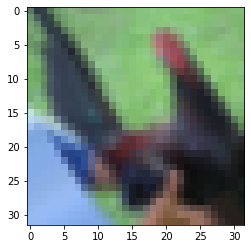

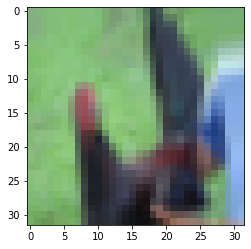

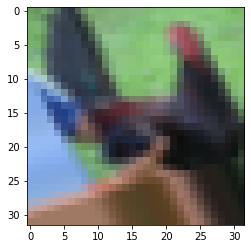

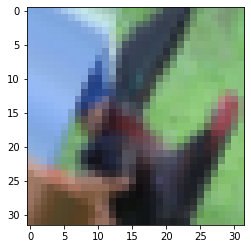

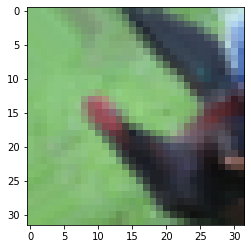

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Create a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# pick an image to transform
test_img = test_images[25]
img = image.img_to_array(test_img) # Convert image to numpy array
img = img.reshape((1,) + img.shape) # Reshape Image

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'): # This loop runs forever until we break, saving images to current directory
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4: # Show 5 images
    break

plt.show()

## Use a pre-trained model

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

## Dataset

We will load the cats_vs_dogs dataset from the module tensorflow_datasets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Split the data manually into 80% training 10% validation and 10% testing
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteCDFVAD/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


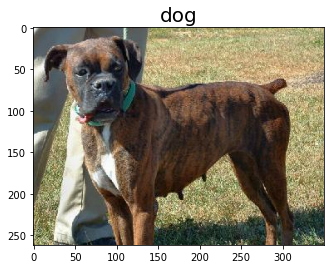

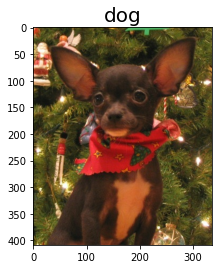

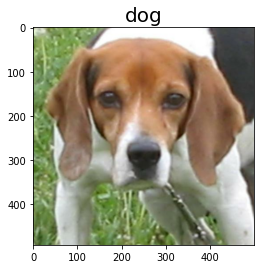

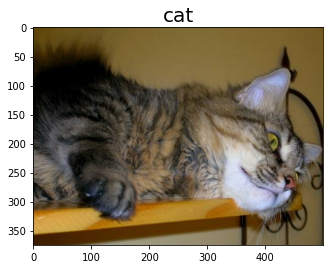

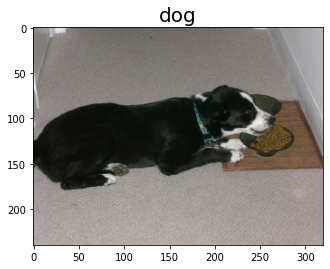

In [ ]:
get_label_name = metadata.features['label'].int2str # Creates a function object that we can use to get labels

# Display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label), fontsize = 20)

## Data Preprocessing

Since the size of our images are all different we need to convert them to the same size. We cancreate a function that will do that for us.

In [ ]:
IMG_SIZE = 160

def format_example(image, label):
  """
  Returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image, cmap = plt.cm.binary)
  plt.title(get_label_name(label))

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for img, label in raw_train.take(2):
  print("Original Shape:", img.shape)

for img, label in train.take(2):
  print("New Shape:", img.shape)

Original Shape: (262, 350, 3)
Original Shape: (409, 336, 3)
New Shape: (160, 160, 3)
New Shape: (160, 160, 3)


## Picking a Pretrained Model

The model we are going to use as the Convolutional base for our model is the MobileNet V2. We are just choosing only for its convolutional base.

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pretrained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [ ]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Freezing the base

The term Freezing refers to disabling the training property of a layer. It simply means we won't make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change convolutional base that already has learned weights.

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

## Adding our Classifier

Now that we have our base layer setup we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([
                             base_model,
                             global_average_layer,
                             prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


## Training the model

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 14s 639ms/step - loss: 0.7889 - accuracy: 0.4847


In [ ]:
# Training
model.fit(train_batches,
          epochs = initial_epochs,
          validation_data = validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 427s 725ms/step - loss: 0.2164 - accuracy: 0.9023 - val_loss: 0.0892 - val_accuracy: 0.9656
Epoch 2/3
582/582 [==============================] - 416s 712ms/step - loss: 0.0733 - accuracy: 0.9744 - val_loss: 0.0643 - val_accuracy: 0.9772
Epoch 3/3
582/582 [==============================] - 420s 719ms/step - loss: 0.0585 - accuracy: 0.9783 - val_loss: 0.0558 - val_accuracy: 0.9798
[0.4411799907684326, 0.5836399793624878, 0.6379799842834473, 0.6704599857330322, 0.6980400085449219, 0.7170000076293945, 0.7336599826812744, 0.7457000017166138, 0.7574800252914429, 0.7680000066757202]


In [ ]:
model.evaluate(test_batches, verbose = 1)

# test_loss, test_acc = model.evaluate(test_batches, verbose = 2)
# print(test_acc)

73/73 [==============================] - 45s 614ms/step - loss: 0.0540 - accuracy: 0.9819


[0.054034262895584106, 0.9819432497024536]

In [ ]:
for a, b in test_batches.take(1):
  print(b)

tf.Tensor([0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0], shape=(32,), dtype=int64)
